<a href="https://colab.research.google.com/github/adsamardeep/Identify-the-dance-form/blob/master/hackathons/hackerearth_dancer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import PIL
import cv2 ,pickle
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
test_data = pd.read_csv("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/test.csv")
train_data = pd.read_csv("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/train.csv")

In [4]:
test_data.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [5]:
train_data.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [0]:
train = []
for i in train_data["Image"]:
    path = "/content/drive/My Drive/HackerEarth/IdentifyDanceForms/train/"+i
    img_data = cv2.imread(path)
    img_data = cv2.resize(img_data, (224, 224), 
                           interpolation=cv2.INTER_NEAREST)
    train.append(np.array(img_data))

In [0]:
test = []
for i in test_data["Image"]:
  path = "/content/drive/My Drive/HackerEarth/IdentifyDanceForms/test/"+i
  img_data = cv2.imread(path)
  img_data = cv2.resize(img_data, (224, 224), 
                           interpolation=cv2.INTER_NEAREST)
  test.append(np.array(img_data))

In [11]:
train[0].shape

(224, 224, 3)

In [0]:
import pickle
pickle.dump(train,open("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/train.npy","wb"))
pickle.dump(test, open("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/test.npy","wb"))

In [0]:
test_img = pickle.load(open("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/test.npy","rb"))
train_img = pickle.load(open("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/train.npy","rb"))

In [0]:
train_img = np.array(train_img)
test_img = np.array(test_img)

In [26]:
train_data.head() 

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [0]:
encoder = LabelEncoder()
encoder.fit(train_data["target"])
encoded_Y = encoder.transform(train_data["target"])
dummy_y = np_utils.to_categorical(encoded_Y)

In [28]:
dummy_y.shape

(364, 8)

In [29]:
train_img.shape

(364, 224, 224, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=3, activation='relu', input_shape=train_img[0].shape))
model.add(Conv2D(filters=3,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=3,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=3,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(8,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 3)       84        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 3)       84        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 3)         84        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 3)         84        
_________________________________________________________________
flatten_2 (Flatten)          (None, 1323)             

In [33]:
history = model.fit(train_img, dummy_y, epochs=50, batch_size=50)

Epoch 1/50
364/364 [==============================] - 7s 18ms/step - loss: 6.8655 - acc: 0.1676
Epoch 2/50
364/364 [==============================] - 0s 548us/step - loss: 2.6331 - acc: 0.2033
Epoch 3/50
364/364 [==============================] - 0s 556us/step - loss: 2.0813 - acc: 0.2143
Epoch 4/50
364/364 [==============================] - 0s 552us/step - loss: 1.9488 - acc: 0.2555
Epoch 5/50
364/364 [==============================] - 0s 538us/step - loss: 1.8249 - acc: 0.3214
Epoch 6/50
364/364 [==============================] - 0s 548us/step - loss: 1.7226 - acc: 0.3599
Epoch 7/50
364/364 [==============================] - 0s 545us/step - loss: 1.6143 - acc: 0.4066
Epoch 8/50
364/364 [==============================] - 0s 573us/step - loss: 1.4950 - acc: 0.4588
Epoch 9/50
364/364 [==============================] - 0s 541us/step - loss: 1.3512 - acc: 0.5220
Epoch 10/50
364/364 [==============================] - 0s 541us/step - loss: 1.2164 - acc: 0.5852
Epoch 11/50
364/364 [=========

In [0]:
from matplotlib import pyplot as plt

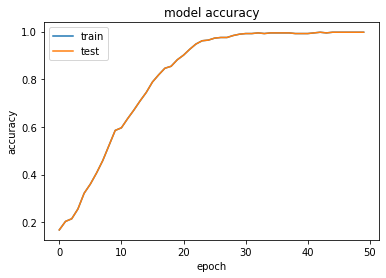

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

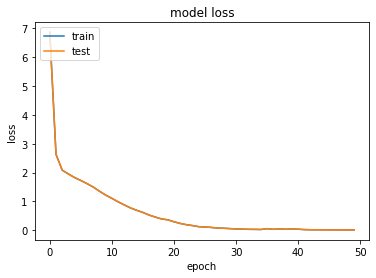

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
pred = model.predict_classes(test_img)
pred = encoder.inverse_transform(pred)
result = pd.DataFrame(pred, test_data["Image"], columns=["target"])
result.to_csv("sample1.csv")

Resnet

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False, 
    input_shape=(224, 224, 3), 
    pooling='avg'
)

94773248/94765736 [==============================] - 1s 0us/step


In [40]:
base_model.trainable = False

model = Sequential([
  base_model,
  Dropout(0.2),
  Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16392     
Total params: 23,604,104
Trainable params: 16,392
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_loss', 
                             verbose=1, save_best_only= True, 
                             mode='auto')    

In [0]:
batch_size =5
epochs = 100

In [43]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_generator = datagen.flow(train_img, dummy_y,
                                  batch_size=batch_size)

history = model.fit_generator(
         training_generator,
         steps_per_epoch= training_generator.n//training_generator.batch_size,
         callbacks=[checkpoint],
         epochs= epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
72/72 [==============================] - 4s 55ms/step - loss: 2.1628 - accuracy: 0.2841
Epoch 2/100
72/72 [==============================] - 4s 55ms/step - loss: 1.0773 - accuracy: 0.6379
Epoch 3/100
72/72 [==============================] - 4s 54ms/step - loss: 0.8990 - accuracy: 0.6769
Epoch 4/100
72/72 [==============================] - 4s 54ms/step - loss: 0.7075 - accuracy: 0.7604
Epoch 5/100
72/72 [==============================] - 4s 54ms/step - loss: 0.5370 - accuracy: 0.8357
Epoch 6/100
72/72 [==============================] - 4s 52ms/step - loss: 0.5183 - accuracy: 0.8189
Epoch 7/100
72/72 [==============================] - 4s 54ms/step - loss: 0.4181 - accuracy: 0.8635
Epoch 8/100
72/72 [==============================] - 4s 54ms/step - loss: 0.4669 - accuracy: 0.8496
Epoch 9/100
72/72 [==============================] - 4s 55ms/step - loss: 0.2834 - accuracy: 0.9220
Epoch 10/100
72/72 [====

In [0]:
pred = model.predict(test_img)
pred = np.argmax(pred, axis=1)
test_data = pd.read_csv("/content/drive/My Drive/HackerEarth/IdentifyDanceForms/test.csv")

pred = encoder.inverse_transform(pred)
result = pd.DataFrame(pred, test_data["Image"], columns=["target"])
result.to_csv("sample2.csv")